<a href="https://colab.research.google.com/github/geonextgis/End-to-End-Deep-Learning/blob/main/01_ANN/00_Introduction_to_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Perceptron**

A perceptron is one of the simplest and fundamental building blocks in deep learning and artificial neural networks. It was developed by Frank Rosenblatt in the late 1950s and is a type of artificial neuron or node that can be used for binary classification tasks. While perceptrons are limited in their capabilities compared to more complex neural network architectures, they serve as a foundational concept for understanding how neural networks work.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/1*gGmqkjA0VJCe5EhJnoQDNg.png" width="50%"></center>

Here's an introduction to perceptrons in deep learning:

1. **Basic Structure**: A perceptron takes multiple binary inputs (0 or 1) and produces a single binary output (0 or 1). Each input is associated with a weight, and there is also an additional parameter called the bias. Mathematically, the output of a perceptron is calculated as the weighted sum of inputs plus the bias, followed by applying a step function (often the Heaviside step function or a similar activation function) to the sum.

$$y = \text{Activation Function}\left(\sum_{i=1}^{n} \text{weight}_i \cdot \text{input}_i + \text{bias}\right)$$


2. **Weights and Bias**: The weights in a perceptron represent the strength of the connection between the inputs and the output. A larger weight means that the corresponding input has a stronger influence on the output. The bias acts as an offset, allowing the perceptron to produce different outputs even when all inputs are zero.

3. **Activation Function**: The activation function determines whether the perceptron should fire (output 1) or not (output 0) based on the weighted sum of inputs plus the bias. The choice of activation function is crucial, as it introduces non-linearity into the model. Common activation functions include the step function, sigmoid, ReLU (Rectified Linear Unit), and others.

## **Import Required Libraries**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

## **Read the Data**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub Repo/Mastering-Machine-Learning-and-GEE-for-Earth-Science/Datasets/Placement.csv")
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [5]:
# Check if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## **Train Test Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("placed", axis=1),
                                                    df["placed"],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((70, 2), (30, 2))

## **Data Visualization**

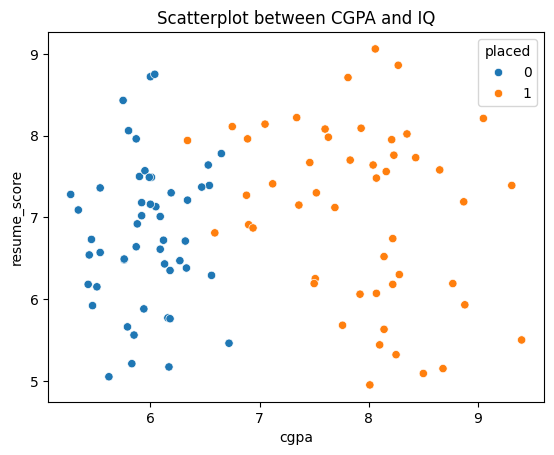

In [9]:
# Display a scatterplot between CGPA and IQ
sns.scatterplot(data=df, x="cgpa", y="resume_score", hue=df["placed"])
plt.title("Scatterplot between CGPA and IQ")
plt.show()

## **Train a Perceptron for Classification**

In [11]:
# Create an object of the Perceptron class
perceptron = Perceptron(random_state=0)

# Fit the training data
perceptron.fit(X_train, y_train)

Perceptron()

In [12]:
# Check all the coefficients (weights)
perceptron.coef_

array([[ 43.34, -37.48]])

In [13]:
# Check the intercept (bias)
perceptron.intercept_

array([-43.])

In [15]:
# Predict the test data
y_pred = perceptron.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1])

## **Accuracy Assessment**

In [19]:
print("Accuracy of Perceptron Model:", accuracy_score(y_test, y_pred).round(2))

Accuracy of Perceptron Model: 0.77


## **Display the Decision Boundary**

<Axes: >

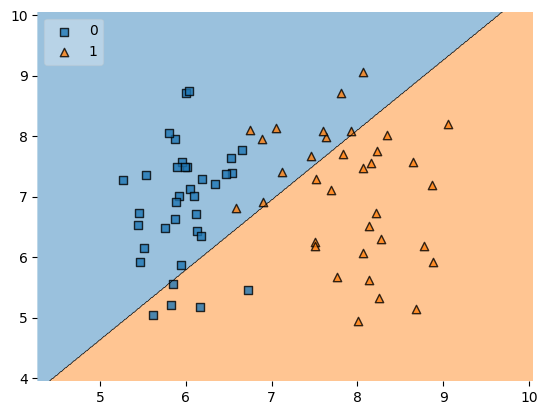

In [21]:
plot_decision_regions(X_train.values, y_train.values, clf=perceptron, legend=2)